<a href="https://colab.research.google.com/github/LokeshVadlamudi/EmergingTechnologiesML/blob/master/Assignment_2/Assignment_2_part2/assignment2_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

#let set the batch size

In [ ]:
bs = 64 # batch size

#downloading the cifar dataset

In [ ]:
path = untar_data(URLs.CIFAR);

#displaying the paths of train,test sets

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/cifar10/test'),
 PosixPath('/root/.fastai/data/cifar10/labels.txt'),
 PosixPath('/root/.fastai/data/cifar10/train')]

#separating train and test sets

In [ ]:
path_train = path/'train'
path_test = path/'test'

#Displaying folders under training dataset

In [ ]:
path_train.ls()

[PosixPath('/root/.fastai/data/cifar10/train/deer'),
 PosixPath('/root/.fastai/data/cifar10/train/truck'),
 PosixPath('/root/.fastai/data/cifar10/train/ship'),
 PosixPath('/root/.fastai/data/cifar10/train/frog'),
 PosixPath('/root/.fastai/data/cifar10/train/airplane'),
 PosixPath('/root/.fastai/data/cifar10/train/horse'),
 PosixPath('/root/.fastai/data/cifar10/train/automobile'),
 PosixPath('/root/.fastai/data/cifar10/train/bird'),
 PosixPath('/root/.fastai/data/cifar10/train/dog'),
 PosixPath('/root/.fastai/data/cifar10/train/cat')]

#displaying folders under test dataset

In [ ]:
path_test.ls()

[PosixPath('/root/.fastai/data/cifar10/test/deer'),
 PosixPath('/root/.fastai/data/cifar10/test/truck'),
 PosixPath('/root/.fastai/data/cifar10/test/ship'),
 PosixPath('/root/.fastai/data/cifar10/test/frog'),
 PosixPath('/root/.fastai/data/cifar10/test/airplane'),
 PosixPath('/root/.fastai/data/cifar10/test/horse'),
 PosixPath('/root/.fastai/data/cifar10/test/automobile'),
 PosixPath('/root/.fastai/data/cifar10/test/bird'),
 PosixPath('/root/.fastai/data/cifar10/test/dog'),
 PosixPath('/root/.fastai/data/cifar10/test/cat')]

#data loader from the folder, setting training,testing and batch size

In [ ]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Test: None

#show batch shows all images with appropriate image labels

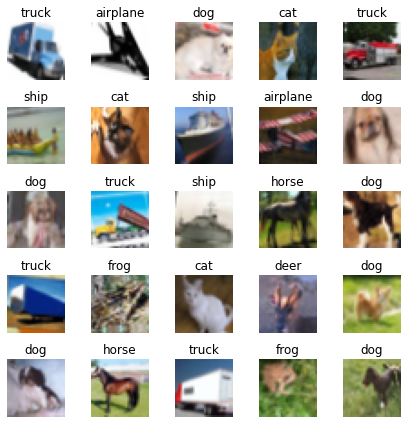

In [ ]:
data.show_batch(rows=5, figsize=(6,6))

#setting up CNN model with resnet34 and accuracy metric

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.371256,1.162185,0.604200,02:13
1,0.988429,0.874735,0.694200,02:12
2,0.848616,0.773075,0.731300,02:12
3,0.809752,0.724910,0.746100,02:14


**Test Time Augmentation:**

It is a form of data augmentation, where in test data is augmented. Multiple copies of each data image in test set is taken and model is allowed to predict those images and the ensemble of those results is taken.

In [ ]:
preds,targs = learn.TTA()
accuracy(preds, targs).item()

0.7802000045776367

**Mixup**

Mixup is also a form of data augmentation technique where two pictures or more than 2 images are combined and fed into the training process.

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy).mixup()
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.748868,1.313048,0.548600,02:15
1,1.409545,0.904504,0.696200,02:15
2,1.331060,0.832014,0.720300,02:15
3,1.294305,0.823222,0.719900,02:15


#Label Smoothing
It is one of the regularization techniques which help in overcoming overconfidence and overfitting. It is used when loss function is cross entropy

In [ ]:
learn = create_cnn(data, models.resnet34, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.575361,1.469465,0.581200,02:14
1,1.269444,1.212820,0.689200,02:16
2,1.175172,1.095571,0.732100,02:15
3,1.123626,1.073643,0.741600,02:15


#Cutout augmentation

In this form of data augmentation, the images are cutted not entirely but some portion of the image. These images are then fed into the training process to avoid overfitting. Generally the cut portion will be in the shape of square.

In [ ]:
tfms = [cutout(n_holes=(1,4), length=(8, 20), p=1.),cutout(n_holes=(1,4), length=(8,20), p=1.)]


In [ ]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=tfms, num_workers=0)
data.normalize(cifar_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
deer,deer,deer,deer,deer
Path: /root/.fastai/data/cifar10;

Test: None

@showing after the images were cut out


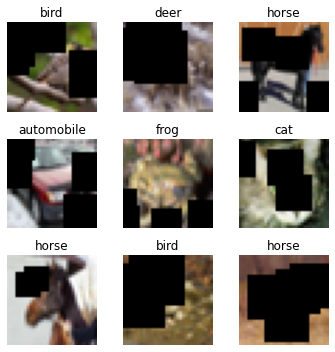

In [ ]:
data.show_batch(rows=3, figsize=(5,5))

#setting up CNN model to train using cutout images."

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(4, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.812864,1.623382,0.414500,01:42
1,1.428498,1.335553,0.519300,01:41
2,1.305641,1.221674,0.555400,01:42
3,1.260113,1.192580,0.575000,01:42
